## VSRR Provisional Drug Overdose Deaths

In [395]:
import plotly.graph_objects as go
import plotly.io as pio
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import pyplot as py
from matplotlib import rcParams
py.style.use('fivethirtyeight')
import seaborn as sns
plt.style.use('seaborn-white')
from IPython.display import Image, YouTubeVideo
from PIL import Image
%matplotlib inline
from scipy.stats import linregress

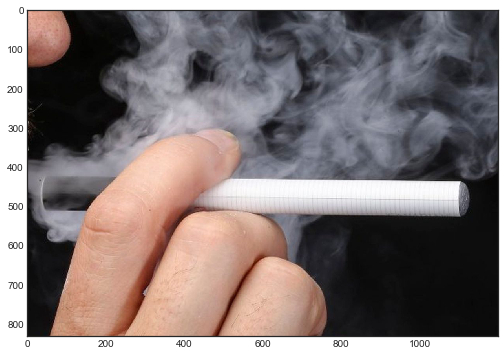

In [390]:
img = plt.imread('GOYG3WNDSRA6ZHSOXKZWV6P5RE.jpg')
plt.rcParams["figure.figsize"] = (8,6)
plt.imshow(img)

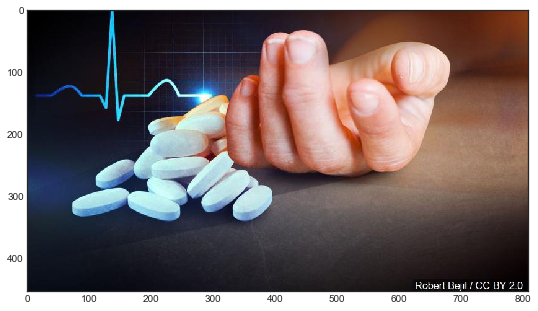

In [313]:
img = plt.imread('drugoverdose+mgn.jpg')
plt.rcParams["figure.figsize"] = (8,6)
plt.imshow(img)

In [314]:
df = pd.read_csv("VSRR_Provisional_Drug_Overdose_Death_Counts.csv")
df

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126
1,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Percent with drugs specified,88.0952381,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Number of Deaths,"4,133",100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29563,YC,2019,May,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...","1,020",100,0.071724,New York City,Underreported due to incomplete data.,*,"1,030"
29564,YC,2019,May,12 month-ending,Methadone (T40.3),161,100,0.071724,New York City,Underreported due to incomplete data.,*,164
29565,YC,2019,May,12 month-ending,Cocaine (T40.5),631,100,0.071724,New York City,Underreported due to incomplete data.,*,642
29566,YC,2019,May,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",849,100,0.071724,New York City,Underreported due to incomplete data.,*,858


In [388]:
df.dtypes

State                             object
Year                               int64
Month                             object
Period                            object
Indicator                         object
Data Value                       float64
Percent Complete                  object
Percent Pending Investigation    float64
State Name                        object
Footnote                          object
Footnote Symbol                   object
Predicted Value                   object
dtype: object

In [316]:
# Remove commas which are giving us an error
df['Data Value']=df['Data Value'].str.replace(',','')

In [317]:
# Convert Data value to numerical
df["Data Value"] = pd.to_numeric(df["Data Value"])

In [318]:
# Filter data frame where Indicator = "Number of Drug Overdose Deaths"
df = df[df["Indicator"] == "Number of Drug Overdose Deaths"]
df

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126
17,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,124
25,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,121
40,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,127
50,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126
...,...,...,...,...,...,...,...,...,...,...,...,...
29516,YC,2019,January,12 month-ending,Number of Drug Overdose Deaths,1456.0,100,0.055038,New York City,Underreported due to incomplete data.,*,"1,456"
29521,YC,2019,July,12 month-ending,Number of Drug Overdose Deaths,1463.0,100,0.073275,New York City,Underreported due to incomplete data.,*,"1,473"
29533,YC,2019,June,12 month-ending,Number of Drug Overdose Deaths,1435.0,100,0.073523,New York City,Underreported due to incomplete data.,*,"1,443"
29545,YC,2019,March,12 month-ending,Number of Drug Overdose Deaths,1470.0,100,0.057005,New York City,Underreported due to incomplete data.,*,"1,476"


## Top 10 States in August 2019

In [9]:
# Filter data frame to August 2019
df_2019 = df[df["Year"] == 2019]
df_2019_Aug = df_2019[df_2019["Month"] == "August"]
df_2019_Aug

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
588,AK,2019,August,12 month-ending,Number of Drug Overdose Deaths,128.0,100,0.156986,Alaska,Underreported due to incomplete data.,*,131
819,AL,2019,August,12 month-ending,Number of Drug Overdose Deaths,728.0,100,0.188665,Alabama,Underreported due to incomplete data.,*,743
987,AR,2019,August,12 month-ending,Number of Drug Overdose Deaths,358.0,100,0.065455,Arkansas,Underreported due to incomplete data.,*,360
1596,AZ,2019,August,12 month-ending,Number of Drug Overdose Deaths,1819.0,100,0.180619,Arizona,Underreported due to incomplete data.,*,"1,855"
1827,CA,2019,August,12 month-ending,Number of Drug Overdose Deaths,5878.0,100,0.430015,California,Underreported due to incomplete data.,*,"6,180"
2436,CO,2019,August,12 month-ending,Number of Drug Overdose Deaths,1015.0,99.5+,0.032936,Colorado,Underreported due to incomplete data.,*,"1,017"
3108,CT,2019,August,12 month-ending,Number of Drug Overdose Deaths,1137.0,100,0.406082,Connecticut,Underreported due to incomplete data.,*,"1,192"
3780,DC,2019,August,12 month-ending,Number of Drug Overdose Deaths,317.0,100,0.033835,District of Columbia,Underreported due to incomplete data.,*,318
4452,DE,2019,August,12 month-ending,Number of Drug Overdose Deaths,418.0,100,0.107933,Delaware,Underreported due to incomplete data.,*,423
4683,FL,2019,August,12 month-ending,Number of Drug Overdose Deaths,5114.0,100,0.100736,Florida,Underreported due to incomplete data.,*,"5,165"


In [10]:
# Create plot of drug overdoses by state in August 2019 - top 5 states
df_2019_Aug = df_2019_Aug.sort_values(by=["Data Value"],ascending = False)
df_2019_Aug

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
24108,US,2019,August,12 month-ending,Number of Drug Overdose Deaths,67410.0,100,0.238000,United States,Underreported due to incomplete data.,*,"69,210"
1827,CA,2019,August,12 month-ending,Number of Drug Overdose Deaths,5878.0,100,0.430015,California,Underreported due to incomplete data.,*,"6,180"
4683,FL,2019,August,12 month-ending,Number of Drug Overdose Deaths,5114.0,100,0.100736,Florida,Underreported due to incomplete data.,*,"5,165"
20139,PA,2019,August,12 month-ending,Number of Drug Overdose Deaths,4218.0,100,0.243944,Pennsylvania,Underreported due to incomplete data.,*,"4,334"
18564,OH,2019,August,12 month-ending,Number of Drug Overdose Deaths,4117.0,100,0.055865,Ohio,Underreported due to incomplete data.,*,"4,136"
23436,TX,2019,August,12 month-ending,Number of Drug Overdose Deaths,2952.0,100,0.256952,Texas,Underreported due to incomplete data.,*,"3,038"
15876,NJ,2019,August,12 month-ending,Number of Drug Overdose Deaths,2720.0,100,0.268988,New Jersey,Underreported due to incomplete data.,*,"2,804"
7476,IL,2019,August,12 month-ending,Number of Drug Overdose Deaths,2651.0,100,0.158488,Illinois,Underreported due to incomplete data.,*,"2,696"
10500,MD,2019,August,12 month-ending,Number of Drug Overdose Deaths,2327.0,100,0.057523,Maryland,Underreported due to incomplete data.,*,"2,338"
11844,MI,2019,August,12 month-ending,Number of Drug Overdose Deaths,2273.0,100,0.225607,Michigan,Underreported due to incomplete data.,*,"2,331"


In [11]:
# Delete row with US
df_2019_Aug = df_2019_Aug[df_2019_Aug["State"] != "US"]
df_2019_Aug

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
1827,CA,2019,August,12 month-ending,Number of Drug Overdose Deaths,5878.0,100,0.430015,California,Underreported due to incomplete data.,*,"6,180"
4683,FL,2019,August,12 month-ending,Number of Drug Overdose Deaths,5114.0,100,0.100736,Florida,Underreported due to incomplete data.,*,"5,165"
20139,PA,2019,August,12 month-ending,Number of Drug Overdose Deaths,4218.0,100,0.243944,Pennsylvania,Underreported due to incomplete data.,*,"4,334"
18564,OH,2019,August,12 month-ending,Number of Drug Overdose Deaths,4117.0,100,0.055865,Ohio,Underreported due to incomplete data.,*,"4,136"
23436,TX,2019,August,12 month-ending,Number of Drug Overdose Deaths,2952.0,100,0.256952,Texas,Underreported due to incomplete data.,*,"3,038"
15876,NJ,2019,August,12 month-ending,Number of Drug Overdose Deaths,2720.0,100,0.268988,New Jersey,Underreported due to incomplete data.,*,"2,804"
7476,IL,2019,August,12 month-ending,Number of Drug Overdose Deaths,2651.0,100,0.158488,Illinois,Underreported due to incomplete data.,*,"2,696"
10500,MD,2019,August,12 month-ending,Number of Drug Overdose Deaths,2327.0,100,0.057523,Maryland,Underreported due to incomplete data.,*,"2,338"
11844,MI,2019,August,12 month-ending,Number of Drug Overdose Deaths,2273.0,100,0.225607,Michigan,Underreported due to incomplete data.,*,"2,331"
9828,MA,2019,August,12 month-ending,Number of Drug Overdose Deaths,2145.0,100,0.240026,Massachusetts,Underreported due to incomplete data.,*,"2,203"


In [12]:
# Pick top 10
df_2019_Aug_10 = df_2019_Aug.head(10)
df_2019_Aug_10

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
1827,CA,2019,August,12 month-ending,Number of Drug Overdose Deaths,5878.0,100,0.430015,California,Underreported due to incomplete data.,*,"6,180"
4683,FL,2019,August,12 month-ending,Number of Drug Overdose Deaths,5114.0,100,0.100736,Florida,Underreported due to incomplete data.,*,"5,165"
20139,PA,2019,August,12 month-ending,Number of Drug Overdose Deaths,4218.0,100,0.243944,Pennsylvania,Underreported due to incomplete data.,*,"4,334"
18564,OH,2019,August,12 month-ending,Number of Drug Overdose Deaths,4117.0,100,0.055865,Ohio,Underreported due to incomplete data.,*,"4,136"
23436,TX,2019,August,12 month-ending,Number of Drug Overdose Deaths,2952.0,100,0.256952,Texas,Underreported due to incomplete data.,*,"3,038"
15876,NJ,2019,August,12 month-ending,Number of Drug Overdose Deaths,2720.0,100,0.268988,New Jersey,Underreported due to incomplete data.,*,"2,804"
7476,IL,2019,August,12 month-ending,Number of Drug Overdose Deaths,2651.0,100,0.158488,Illinois,Underreported due to incomplete data.,*,"2,696"
10500,MD,2019,August,12 month-ending,Number of Drug Overdose Deaths,2327.0,100,0.057523,Maryland,Underreported due to incomplete data.,*,"2,338"
11844,MI,2019,August,12 month-ending,Number of Drug Overdose Deaths,2273.0,100,0.225607,Michigan,Underreported due to incomplete data.,*,"2,331"
9828,MA,2019,August,12 month-ending,Number of Drug Overdose Deaths,2145.0,100,0.240026,Massachusetts,Underreported due to incomplete data.,*,"2,203"


Text(0.5, 1.0, 'Overdose Deaths - Top 10 States in August 2019')

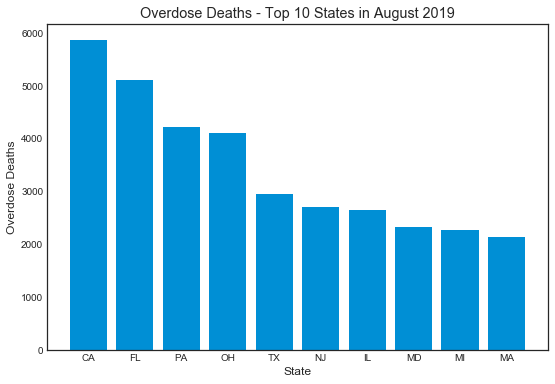

In [13]:
# Create plot
py.bar(x = df_2019_Aug_10["State"], height=df_2019_Aug_10["Data Value"])
py.xlabel("State")
py.ylabel("Overdose Deaths")
py.title("Overdose Deaths - Top 10 States in August 2019")

# Illinois Overdose Deaths by Year

In [14]:
# Filter data frame to only Illinois
df_IL = df[df["State"] == "IL"]
df_IL

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
6888,IL,2015,April,12 month-ending,Number of Drug Overdose Deaths,1735.0,100,0.023020,Illinois,Numbers may differ from published reports usin...,**,"1,735"
6905,IL,2015,August,12 month-ending,Number of Drug Overdose Deaths,1793.0,100,0.026599,Illinois,Numbers may differ from published reports usin...,**,"1,793"
6913,IL,2015,December,12 month-ending,Number of Drug Overdose Deaths,1864.0,100,0.024049,Illinois,Numbers may differ from published reports usin...,**,"1,864"
6928,IL,2015,February,12 month-ending,Number of Drug Overdose Deaths,1657.0,100,0.025200,Illinois,Numbers may differ from published reports usin...,**,"1,657"
6938,IL,2015,January,12 month-ending,Number of Drug Overdose Deaths,1652.0,100,0.025229,Illinois,Numbers may differ from published reports usin...,**,"1,652"
6954,IL,2015,July,12 month-ending,Number of Drug Overdose Deaths,1761.0,100,0.025720,Illinois,Numbers may differ from published reports usin...,**,"1,761"
6969,IL,2015,June,12 month-ending,Number of Drug Overdose Deaths,1766.0,100,0.024845,Illinois,Numbers may differ from published reports usin...,**,"1,766"
6975,IL,2015,March,12 month-ending,Number of Drug Overdose Deaths,1688.0,100,0.025077,Illinois,Numbers may differ from published reports usin...,**,"1,688"
6991,IL,2015,May,12 month-ending,Number of Drug Overdose Deaths,1782.0,100,0.025831,Illinois,Numbers may differ from published reports usin...,**,"1,782"
7000,IL,2015,November,12 month-ending,Number of Drug Overdose Deaths,1860.0,100,0.029453,Illinois,Numbers may differ from published reports usin...,**,"1,860"


In [15]:
# Filter to December data only
df_IL_Dec = df_IL[df_IL["Month"] == "December"]
df_IL_Dec

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
6913,IL,2015,December,12 month-ending,Number of Drug Overdose Deaths,1864.0,100,0.024049,Illinois,Numbers may differ from published reports usin...,**,"1,864"
7065,IL,2016,December,12 month-ending,Number of Drug Overdose Deaths,2427.0,100,0.026900,Illinois,Numbers may differ from published reports usin...,**,"2,427"
7207,IL,2017,December,12 month-ending,Number of Drug Overdose Deaths,2765.0,100,0.033760,Illinois,Numbers may differ from published reports usin...,**,"2,765"
7354,IL,2018,December,12 month-ending,Number of Drug Overdose Deaths,2732.0,100,0.072979,Illinois,Numbers may differ from published reports usin...,**,"2,744"


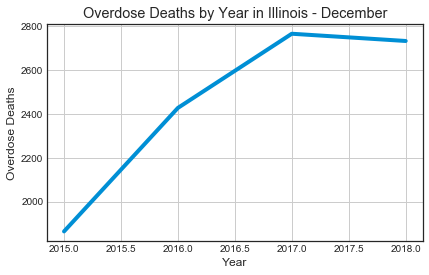

In [25]:
py.plot(df_IL_Dec["Year"], df_IL_Dec["Data Value"])
py.xlabel("Year")
py.ylabel("Overdose Deaths")
plt.grid(True)
py.title("Overdose Deaths by Year in Illinois - December")
plt.rcParams["figure.figsize"] = (6,4)

In [26]:
# Filter data frame to only Florida
df_FL = df[df["State"] == "FL"]
df_FL

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
4536,FL,2015,April,12 month-ending,Number of Drug Overdose Deaths,2886.0,100,0.032247,Florida,Numbers may differ from published reports usin...,**,"2,886"
4540,FL,2015,August,12 month-ending,Number of Drug Overdose Deaths,3204.0,100,0.028812,Florida,Numbers may differ from published reports usin...,**,"3,204"
4542,FL,2015,December,12 month-ending,Number of Drug Overdose Deaths,3352.0,100,0.036542,Florida,Numbers may differ from published reports usin...,**,"3,352"
4545,FL,2015,February,12 month-ending,Number of Drug Overdose Deaths,2824.0,100,0.034104,Florida,Numbers may differ from published reports usin...,**,"2,824"
4549,FL,2015,January,12 month-ending,Number of Drug Overdose Deaths,2755.0,100,0.034889,Florida,Numbers may differ from published reports usin...,**,"2,755"
4551,FL,2015,July,12 month-ending,Number of Drug Overdose Deaths,3117.0,100,0.031464,Florida,Numbers may differ from published reports usin...,**,"3,117"
4556,FL,2015,June,12 month-ending,Number of Drug Overdose Deaths,2983.0,100,0.031543,Florida,Numbers may differ from published reports usin...,**,"2,983"
4558,FL,2015,March,12 month-ending,Number of Drug Overdose Deaths,2862.0,100,0.033378,Florida,Numbers may differ from published reports usin...,**,"2,862"
4561,FL,2015,May,12 month-ending,Number of Drug Overdose Deaths,2958.0,100,0.033149,Florida,Numbers may differ from published reports usin...,**,"2,958"
4564,FL,2015,November,12 month-ending,Number of Drug Overdose Deaths,3340.0,100,0.032768,Florida,Numbers may differ from published reports usin...,**,"3,340"


In [27]:
# Filter to December data only
df_FL_Dec = df_FL[df_FL["Month"] == "December"]
df_FL_Dec

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
4542,FL,2015,December,12 month-ending,Number of Drug Overdose Deaths,3352.0,100,0.036542,Florida,Numbers may differ from published reports usin...,**,"3,352"
4579,FL,2016,December,12 month-ending,Number of Drug Overdose Deaths,4996.0,100,0.047008,Florida,Numbers may differ from published reports usin...,**,"5,002"
4616,FL,2017,December,12 month-ending,Number of Drug Overdose Deaths,5440.0,100,0.064025,Florida,Numbers may differ from published reports usin...,**,"5,457"
4652,FL,2018,December,12 month-ending,Number of Drug Overdose Deaths,4936.0,100,0.049971,Florida,Numbers may differ from published reports usin...,**,"4,943"


Text(0.5, 1.0, 'Overdose Deaths by Year in Florida - December')

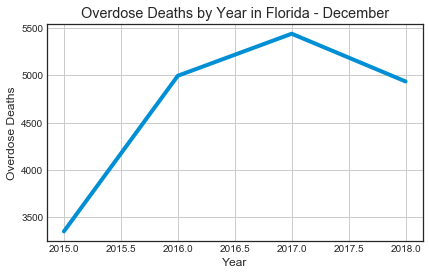

In [28]:
py.plot(df_FL_Dec["Year"], df_FL_Dec["Data Value"])
py.xlabel("Year")
py.ylabel("Overdose Deaths")
plt.grid(True)
py.title("Overdose Deaths by Year in Florida - December")

In [29]:
# Filter data frame to only California
df_CA = df[df["State"] == "CA"]
df_CA

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
1680,CA,2015,April,12 month-ending,Number of Drug Overdose Deaths,4625.0,100,0.222678,California,Numbers may differ from published reports usin...,**,"4,730"
1684,CA,2015,August,12 month-ending,Number of Drug Overdose Deaths,4670.0,100,0.233951,California,Numbers may differ from published reports usin...,**,"4,782"
1686,CA,2015,December,12 month-ending,Number of Drug Overdose Deaths,4762.0,100,0.355918,California,Numbers may differ from published reports usin...,**,"4,951"
1689,CA,2015,February,12 month-ending,Number of Drug Overdose Deaths,4616.0,100,0.230874,California,Numbers may differ from published reports usin...,**,"4,725"
1693,CA,2015,January,12 month-ending,Number of Drug Overdose Deaths,4603.0,100,0.238123,California,Numbers may differ from published reports usin...,**,"4,716"
1695,CA,2015,July,12 month-ending,Number of Drug Overdose Deaths,4628.0,100,0.224339,California,Numbers may differ from published reports usin...,**,"4,734"
1700,CA,2015,June,12 month-ending,Number of Drug Overdose Deaths,4604.0,100,0.219747,California,Numbers may differ from published reports usin...,**,"4,707"
1702,CA,2015,March,12 month-ending,Number of Drug Overdose Deaths,4608.0,100,0.224616,California,Numbers may differ from published reports usin...,**,"4,714"
1705,CA,2015,May,12 month-ending,Number of Drug Overdose Deaths,4607.0,100,0.217444,California,Numbers may differ from published reports usin...,**,"4,708"
1708,CA,2015,November,12 month-ending,Number of Drug Overdose Deaths,4747.0,100,0.308337,California,Numbers may differ from published reports usin...,**,"4,906"


In [30]:
# Filter to December data only
df_CA_Dec = df_CA[df_CA["Month"] == "December"]
df_CA_Dec

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
1686,CA,2015,December,12 month-ending,Number of Drug Overdose Deaths,4762.0,100,0.355918,California,Numbers may differ from published reports usin...,**,"4,951"
1723,CA,2016,December,12 month-ending,Number of Drug Overdose Deaths,4755.0,100,0.363983,California,Numbers may differ from published reports usin...,**,"4,948"
1760,CA,2017,December,12 month-ending,Number of Drug Overdose Deaths,5028.0,100,0.331506,California,Numbers may differ from published reports usin...,**,"5,211"
1796,CA,2018,December,12 month-ending,Number of Drug Overdose Deaths,5494.0,100,0.233257,California,Numbers may differ from published reports usin...,**,"5,626"


Text(0.5, 1.0, 'Overdose Deaths by Year in California - December')

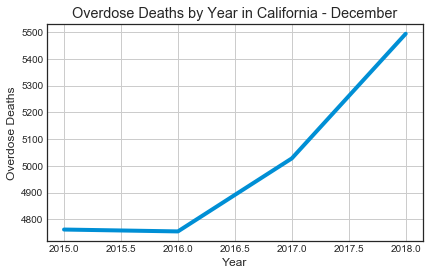

In [31]:
py.plot(df_CA_Dec["Year"], df_CA_Dec["Data Value"])
py.xlabel("Year")
py.ylabel("Overdose Deaths")
plt.grid(True)
py.title("Overdose Deaths by Year in California - December")

In [32]:
# Filter data frame to only Ohio
df_OH = df[df["State"] == "OH"]
df_OH

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
17976,OH,2015,April,12 month-ending,Number of Drug Overdose Deaths,2955.0,100,0.005104,Ohio,Numbers may differ from published reports usin...,**,"2,955"
17993,OH,2015,August,12 month-ending,Number of Drug Overdose Deaths,3153.0,100,0.008411,Ohio,Numbers may differ from published reports usin...,**,"3,153"
18001,OH,2015,December,12 month-ending,Number of Drug Overdose Deaths,3336.0,100,0.026246,Ohio,Numbers may differ from published reports usin...,**,"3,336"
18016,OH,2015,February,12 month-ending,Number of Drug Overdose Deaths,2828.0,100,0.006006,Ohio,Numbers may differ from published reports usin...,**,"2,828"
18026,OH,2015,January,12 month-ending,Number of Drug Overdose Deaths,2829.0,100,0.006038,Ohio,Numbers may differ from published reports usin...,**,"2,829"
18042,OH,2015,July,12 month-ending,Number of Drug Overdose Deaths,3128.0,100,0.005903,Ohio,Numbers may differ from published reports usin...,**,"3,128"
18057,OH,2015,June,12 month-ending,Number of Drug Overdose Deaths,3051.0,100,0.005919,Ohio,Numbers may differ from published reports usin...,**,"3,051"
18063,OH,2015,March,12 month-ending,Number of Drug Overdose Deaths,2843.0,100,0.005987,Ohio,Numbers may differ from published reports usin...,**,"2,843"
18079,OH,2015,May,12 month-ending,Number of Drug Overdose Deaths,3054.0,100,0.006780,Ohio,Numbers may differ from published reports usin...,**,"3,054"
18088,OH,2015,November,12 month-ending,Number of Drug Overdose Deaths,3298.0,100,0.020958,Ohio,Numbers may differ from published reports usin...,**,"3,298"


In [33]:
# Filter to December data only
df_OH_Dec = df_OH[df_OH["Month"] == "December"]
df_OH_Dec

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
18001,OH,2015,December,12 month-ending,Number of Drug Overdose Deaths,3336.0,100,0.026246,Ohio,Numbers may differ from published reports usin...,**,"3,336"
18153,OH,2016,December,12 month-ending,Number of Drug Overdose Deaths,4326.0,100,0.030096,Ohio,Numbers may differ from published reports usin...,**,"4,326"
18295,OH,2017,December,12 month-ending,Number of Drug Overdose Deaths,5138.0,100,0.011301,Ohio,Numbers may differ from published reports usin...,**,"5,138"
18442,OH,2018,December,12 month-ending,Number of Drug Overdose Deaths,4004.0,100,0.016047,Ohio,Numbers may differ from published reports usin...,**,"4,004"


Text(0.5, 1.0, 'Overdose Deaths by Year in Ohio - December')

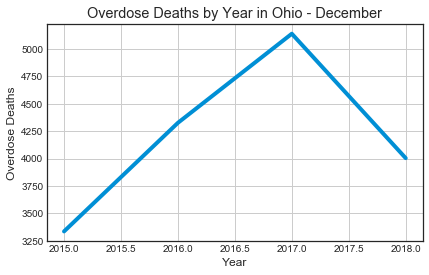

In [34]:
py.plot(df_OH_Dec["Year"], df_OH_Dec["Data Value"])
py.xlabel("Year")
py.ylabel("Overdose Deaths")
plt.grid(True)
py.title("Overdose Deaths by Year in Ohio - December")

In [35]:
# Filter data frame to only New Jersey
df_NJ = df[df["State"] == "NJ"]
df_NJ

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
15288,NJ,2015,April,12 month-ending,Number of Drug Overdose Deaths,1240.0,100,0.241873,New Jersey,Numbers may differ from published reports usin...,**,"1,271"
15305,NJ,2015,August,12 month-ending,Number of Drug Overdose Deaths,1373.0,100,0.192816,New Jersey,Numbers may differ from published reports usin...,**,"1,399"
15313,NJ,2015,December,12 month-ending,Number of Drug Overdose Deaths,1423.0,100,0.348760,New Jersey,Numbers may differ from published reports usin...,**,"1,478"
15328,NJ,2015,February,12 month-ending,Number of Drug Overdose Deaths,1221.0,100,0.257267,New Jersey,Numbers may differ from published reports usin...,**,"1,254"
15338,NJ,2015,January,12 month-ending,Number of Drug Overdose Deaths,1210.0,100,0.259162,New Jersey,Numbers may differ from published reports usin...,**,"1,243"
15354,NJ,2015,July,12 month-ending,Number of Drug Overdose Deaths,1336.0,100,0.190223,New Jersey,Numbers may differ from published reports usin...,**,"1,361"
15369,NJ,2015,June,12 month-ending,Number of Drug Overdose Deaths,1305.0,100,0.214334,New Jersey,Numbers may differ from published reports usin...,**,"1,334"
15375,NJ,2015,March,12 month-ending,Number of Drug Overdose Deaths,1226.0,100,0.243882,New Jersey,Numbers may differ from published reports usin...,**,"1,257"
15391,NJ,2015,May,12 month-ending,Number of Drug Overdose Deaths,1277.0,100,0.231112,New Jersey,Numbers may differ from published reports usin...,**,"1,308"
15400,NJ,2015,November,12 month-ending,Number of Drug Overdose Deaths,1414.0,100,0.288015,New Jersey,Numbers may differ from published reports usin...,**,"1,458"


In [36]:
# Filter to December data only
df_NJ_Dec = df_NJ[df_NJ["Month"] == "December"]
df_NJ_Dec

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
15313,NJ,2015,December,12 month-ending,Number of Drug Overdose Deaths,1423.0,100,0.348760,New Jersey,Numbers may differ from published reports usin...,**,"1,478"
15465,NJ,2016,December,12 month-ending,Number of Drug Overdose Deaths,1971.0,100,0.410643,New Jersey,Numbers may differ from published reports usin...,**,"2,063"
15607,NJ,2017,December,12 month-ending,Number of Drug Overdose Deaths,2621.0,100,0.190682,New Jersey,Numbers may differ from published reports usin...,**,"2,670"
15754,NJ,2018,December,12 month-ending,Number of Drug Overdose Deaths,2857.0,100,0.192428,New Jersey,Numbers may differ from published reports usin...,**,"2,911"


Text(0.5, 1.0, 'Overdose Deaths by Year in New Jersey - December')

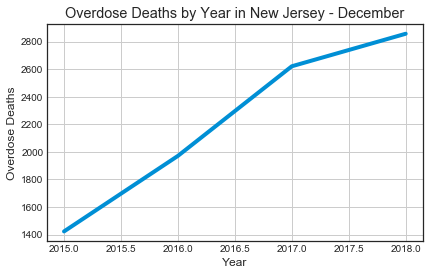

In [37]:
py.plot(df_NJ_Dec["Year"], df_NJ_Dec["Data Value"])
py.xlabel("Year")
py.ylabel("Overdose Deaths")
plt.grid(True)
py.title("Overdose Deaths by Year in New Jersey - December")

In [325]:
# Filter data frame to only Colorado
df_CO = df[df["State"] == "CO"]
df_CO

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
1848,CO,2015,April,12 month-ending,Number of Drug Overdose Deaths,950.0,100,0.021857,Colorado,Numbers may differ from published reports usin...,**,950
1865,CO,2015,August,12 month-ending,Number of Drug Overdose Deaths,928.0,100,0.037710,Colorado,Numbers may differ from published reports usin...,**,928
1873,CO,2015,December,12 month-ending,Number of Drug Overdose Deaths,913.0,100,0.040548,Colorado,Numbers may differ from published reports usin...,**,914
1888,CO,2015,February,12 month-ending,Number of Drug Overdose Deaths,932.0,100,0.019268,Colorado,Numbers may differ from published reports usin...,**,932
1898,CO,2015,January,12 month-ending,Number of Drug Overdose Deaths,923.0,100,0.019303,Colorado,Numbers may differ from published reports usin...,**,923
1914,CO,2015,July,12 month-ending,Number of Drug Overdose Deaths,918.0,100,0.035173,Colorado,Numbers may differ from published reports usin...,**,918
1929,CO,2015,June,12 month-ending,Number of Drug Overdose Deaths,921.0,100,0.024446,Colorado,Numbers may differ from published reports usin...,**,921
1935,CO,2015,March,12 month-ending,Number of Drug Overdose Deaths,939.0,100,0.019284,Colorado,Numbers may differ from published reports usin...,**,939
1951,CO,2015,May,12 month-ending,Number of Drug Overdose Deaths,927.0,100,0.021818,Colorado,Numbers may differ from published reports usin...,**,927
1960,CO,2015,November,12 month-ending,Number of Drug Overdose Deaths,908.0,100,0.040383,Colorado,Numbers may differ from published reports usin...,**,909


In [326]:
# Filter to December data only
df_CO_Dec = df_CO[df_CO["Month"] == "December"]
df_CO_Dec

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
1873,CO,2015,December,12 month-ending,Number of Drug Overdose Deaths,913.0,100,0.040548,Colorado,Numbers may differ from published reports usin...,**,914
2025,CO,2016,December,12 month-ending,Number of Drug Overdose Deaths,965.0,100,0.031454,Colorado,Numbers may differ from published reports usin...,**,965
2167,CO,2017,December,12 month-ending,Number of Drug Overdose Deaths,1040.0,100,0.030961,Colorado,Numbers may differ from published reports usin...,**,"1,040"
2314,CO,2018,December,12 month-ending,Number of Drug Overdose Deaths,1004.0,100,0.033208,Colorado,Numbers may differ from published reports usin...,**,"1,004"


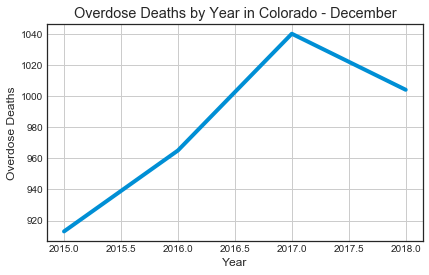

In [327]:
py.plot(df_CO_Dec["Year"], df_CO_Dec["Data Value"])
py.xlabel("Year")
py.ylabel("Overdose Deaths")
plt.grid(True)
py.title("Overdose Deaths by Year in Colorado - December")
plt.rcParams["figure.figsize"] = (6,4)

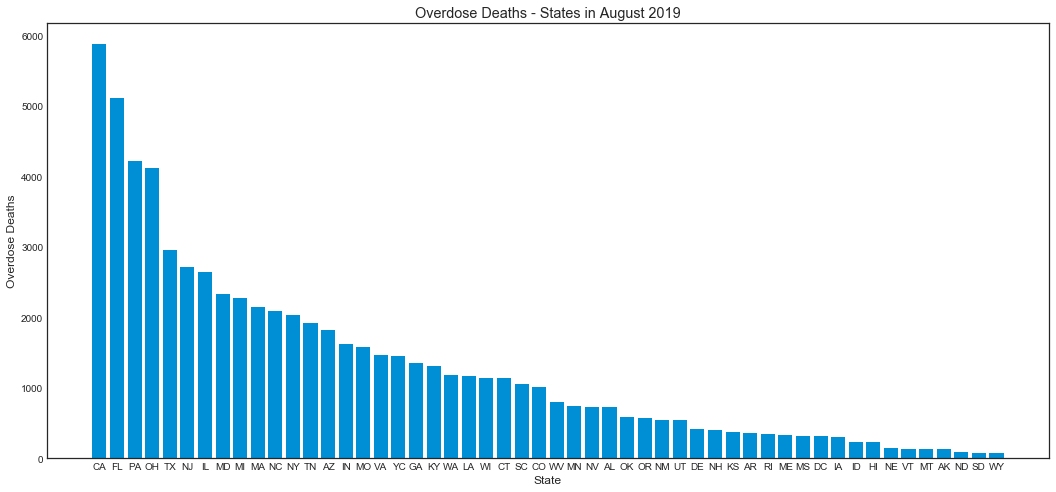

In [39]:
df_2019_Aug = df_2019_Aug[df_2019_Aug["State"] != "US"]
df_2019_Aug
py.bar(x = df_2019_Aug["State"], height=df_2019_Aug["Data Value"])
py.xlabel("State")
py.ylabel("Overdose Deaths")
py.title("Overdose Deaths - States in August 2019")
plt.rcParams["figure.figsize"] = (16,8)

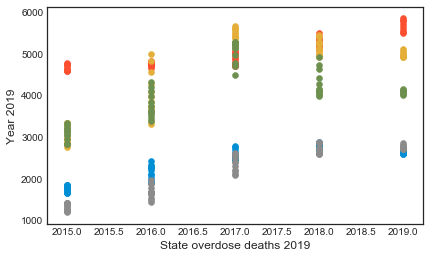

In [41]:
plt.scatter(df_IL['Year'], df_IL['Data Value'])
plt.scatter(df_CA['Year'], df_CA['Data Value'])
plt.scatter(df_FL['Year'], df_FL['Data Value'])
plt.scatter(df_OH['Year'], df_OH['Data Value'])
plt.scatter(df_NJ['Year'], df_NJ['Data Value'])
plt.xlabel("State overdose deaths 2019")
plt.ylabel("Year 2019")
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

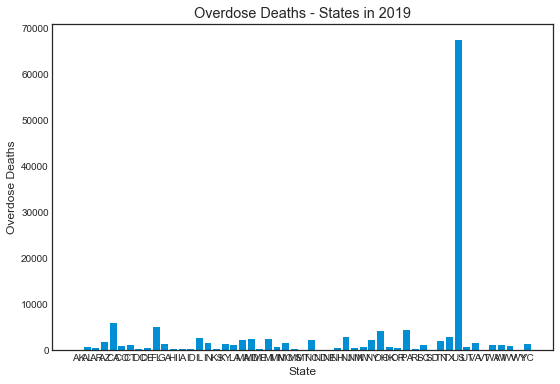

In [360]:
py.bar(x = df_2019["State"], height=df_2019["Data Value"])
py.xlabel("State")
py.ylabel("Overdose Deaths")
py.title("Overdose Deaths - States in 2019")
plt.rcParams["figure.figsize"] = (12,4)

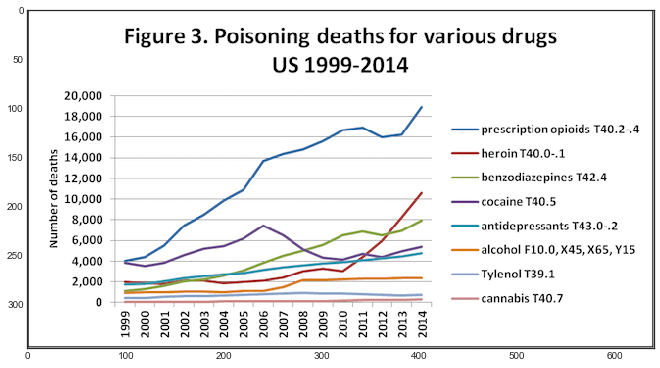

In [145]:
img = plt.imread('https://www.rehabs.com/wp-content/uploads/figure-32.png')
rcParams["figure.figsize"] = (10,8)
plt.imshow(img)

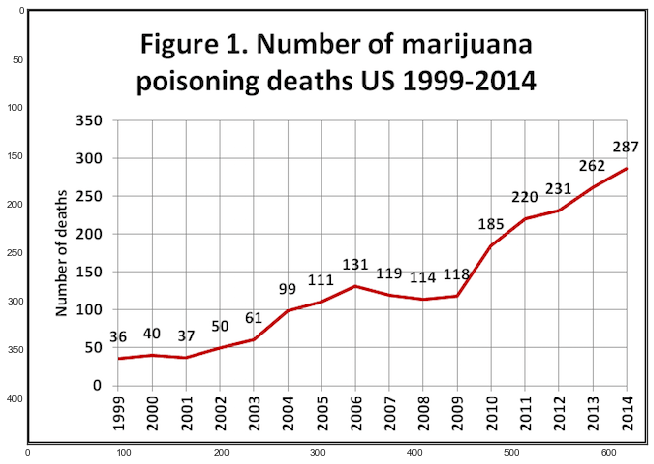

In [147]:
img = plt.imread('https://www.rehabs.com/wp-content/uploads/figure-12.png')
rcParams["figure.figsize"] = (10,8)
plt.imshow(img)

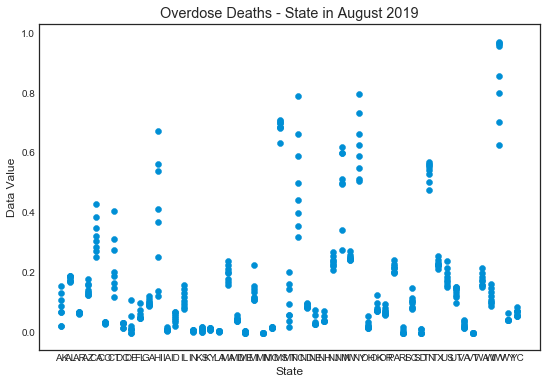

In [291]:
plt.scatter(x = df_2019["State"], y = df_2019["Percent Pending Investigation"])
plt.xlabel("State")
plt.ylabel("Data Value")
plt.title("Overdose Deaths - State in August 2019")
plt.rcParams["figure.figsize"] = (8,6)

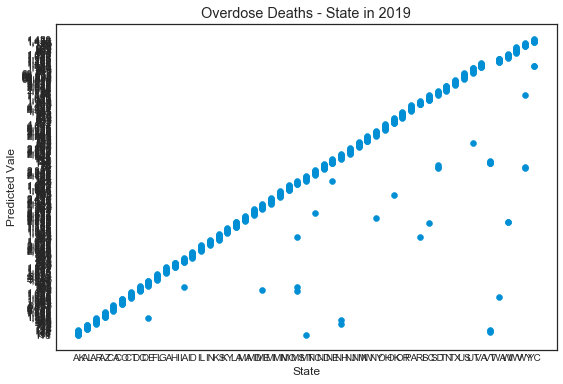

In [358]:
plt.scatter(x = df_2019["State"], y = df_2019["Predicted Value"])
plt.xlabel("State")
plt.ylabel("Predicted Vale")
plt.title("Overdose Deaths - State in 2019")
plt.rcParams["figure.figsize"] = (8,6)

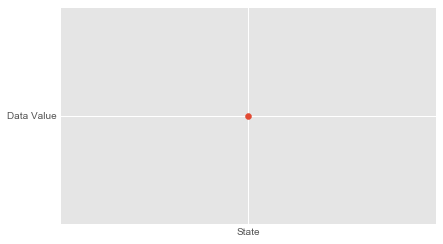

In [386]:
plt.scatter(x = 'State', y = 'Data Value')
plt.rcParams["figure.figsize"] = (6,4)

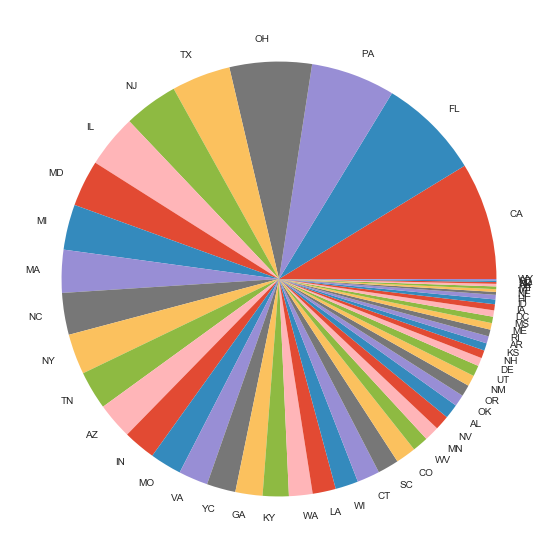

In [379]:
py.pie(df_2019_Aug["Data Value"], labels = df_2019_Aug["State"])
plt.rcParams["figure.figsize"] = (10,10)
py.show()

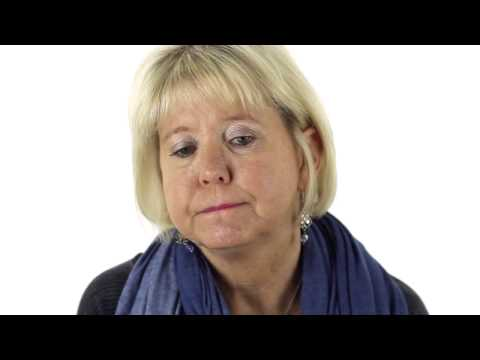

In [302]:
id = 't9otqhToi54'
YouTubeVideo(id=id, width=600, height=400)


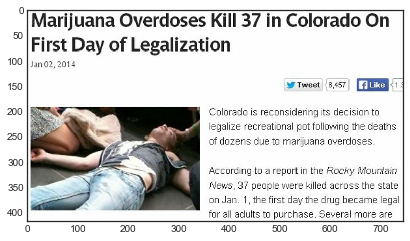

In [303]:
img = plt.imread('marijuana.overdoses.daily.currant.large.jpg')
plt.imshow(img)